In [12]:
%load_ext autoreload
%autoreload 2
import sys 
sys.path.insert(0, '../src/')
import pandas as pd 
import numpy as np 
from utils import * 


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
sales_train_validation = pd.read_csv('../data/sales_train_validation.csv')
sales_train_evaluation = pd.read_csv('../data/sales_train_evaluation.csv') 
print(sales_train_evaluation.info())
print(sales_train_validation.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Columns: 1947 entries, id to d_1941
dtypes: int64(1941), object(6)
memory usage: 452.9+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Columns: 1919 entries, id to d_1913
dtypes: int64(1913), object(6)
memory usage: 446.4+ MB
None


In [7]:
count = 0

# state level 
nu_unique_state= len(set(list(sales_train_validation['state_id'])))
print(f'There are {nu_unique_state} nodes at the state level')
count +=nu_unique_state

# store level 
nu_unique_store = len(set(list(sales_train_validation['store_id'])))
print(f'There are {nu_unique_store} nodes at the store level')
count += nu_unique_store 

# category level 
nu_unique_category = len(set(list(sales_train_validation['cat_id'])))
print(f'There are {nu_unique_category} nodes at the category level')
count += nu_unique_category

# department level 
nu_unique_depart = len(set(list(sales_train_validation['dept_id'])))
print(f'There are {nu_unique_depart} nodes at the department level')
count += nu_unique_depart

# leaf/item level 
nu_unique_items = len(set(list(sales_train_validation['id'])))
print(f'There are {nu_unique_items} leaf node at the item level')
count += nu_unique_items 

There are 3 nodes at the state level
There are 10 nodes at the store level
There are 3 nodes at the category level
There are 7 nodes at the department level
There are 30490 leaf node at the item level


In [8]:
# item_id is not the unique identifier of items, however the id is 
sales_train_validation[sales_train_validation['item_id'] == 'HOBBIES_1_001']

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
3049,HOBBIES_1_001_CA_2_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_2,CA,0,0,0,0,...,0,0,1,2,0,4,0,0,2,2
6098,HOBBIES_1_001_CA_3_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_3,CA,0,0,0,0,...,0,2,4,0,1,1,1,0,3,3
9147,HOBBIES_1_001_CA_4_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_4,CA,0,0,0,0,...,1,0,0,1,0,1,0,1,2,1
12196,HOBBIES_1_001_TX_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,TX_1,TX,0,0,0,0,...,0,0,0,0,1,0,1,0,0,2
15245,HOBBIES_1_001_TX_2_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,TX_2,TX,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
18294,HOBBIES_1_001_TX_3_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,TX_3,TX,0,0,0,0,...,0,3,0,0,0,0,0,0,0,0
21343,HOBBIES_1_001_WI_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,WI_1,WI,0,0,0,0,...,0,0,0,0,0,0,1,2,1,1
24392,HOBBIES_1_001_WI_2_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,WI_2,WI,0,0,0,0,...,1,1,0,0,0,0,0,0,0,1
27441,HOBBIES_1_001_WI_3_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,WI_3,WI,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


<AxesSubplot:>

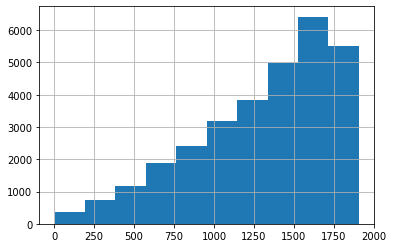

In [9]:
(sales_train_validation.iloc[:,6:] == 0).astype(int).sum(axis = 1).hist()

## Aggregregation at the leaf and the root level 

In [11]:
%%writefile ../src/utils.py 
import pandas as pd 

def export_leaf_root(df,name):

    ts_leaf = df.groupby('id').sum()[df.columns[6:]]
    ts_leaf.to_csv(f'../data/{name}_leaf.csv')

    ts_root = ts_leaf.sum(axis = 0)
    ts_root = pd.DataFrame(ts_root,)
    ts_root.columns = ['sales_quantity']
    ts_root.to_csv(f'../data/{name}_root.csv')

    return ts_leaf, ts_root

Overwriting ../src/utils.py


In [14]:
sales_train_validation_leaf, sales_train_validation_root = export_leaf_root(sales_train_validation,'sales_train_validation')
sales_train_evaluation_leaf, sales_train_evaluation_root = export_leaf_root(sales_train_evaluation,'sales_train_evaluation')

In [15]:
sales_train_validation[sales_train_validation.columns[:6]]

,id,item_id,dept_id,cat_id,store_id,state_id
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA
...,...,...,...,...,...,...
30485,FOODS_3_823_WI_3_validation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI
30486,FOODS_3_824_WI_3_validation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI
30487,FOODS_3_825_WI_3_validation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI
30488,FOODS_3_826_WI_3_validation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI


In [9]:
sample_submission = pd.read_csv('../data/sample_submission.csv')
sample_submission.head()

,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
0,HOBBIES_1_001_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,HOBBIES_1_002_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,HOBBIES_1_004_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,HOBBIES_1_005_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
